In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [21]:
# Assuming your dataset is in a CSV file named 'company_data.csv'
data = pd.read_csv('C:/Users/1234/Downloads/Company_Data.csv')
# Display the first few rows of the dataset
print(data.head())


   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [22]:
# Convert 'Sales' to a categorical variable
# You can define your own criteria to categorize sales into high, medium, and low
data['Sales_Category'] = pd.qcut(data['Sales'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Drop the original 'Sales' column
data.drop('Sales', axis=1, inplace=True)

# Check the updated dataset
print(data.head())


   CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Category  
0         17   Yes  Yes           High  
1         10   Yes  Yes           High  
2         12   Yes  Yes           High  
3         14   Yes  Yes         Medium  
4         13   Yes   No            Low  


In [23]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Display the updated dataset
print(data_encoded.head())


   CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

  Sales_Category  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  \
0           High           True           False             False     False   
1           High          False            True             False     False   
2           High          False           False              True     False   
3         Medium          False           False              True     False   
4            Low           True           False             False     False   

   Urban_Yes  US_No  US_Yes  
0       True  False    True  
1       True  False    True  
2 

In [24]:
X = data_encoded.drop('Sales_Category', axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6125

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.70      0.74        33
         Low       0.59      0.64      0.62        25
      Medium       0.42      0.45      0.43        22

    accuracy                           0.61        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.63      0.61      0.62        80


Confusion Matrix:
 [[23  3  7]
 [ 2 16  7]
 [ 4  8 10]]


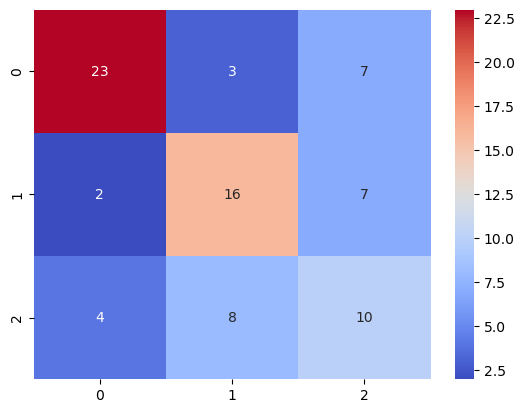

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'coolwarm')
plt.show()

In [30]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)


             Feature  Importance
4              Price    0.173718
0          CompPrice    0.122387
1             Income    0.118273
5                Age    0.114664
2        Advertising    0.098181
3         Population    0.097045
6          Education    0.071252
7      ShelveLoc_Bad    0.061801
8     ShelveLoc_Good    0.060932
9   ShelveLoc_Medium    0.026484
11         Urban_Yes    0.015247
10          Urban_No    0.014569
12             US_No    0.012977
13            US_Yes    0.012469
